usage: ipykernel_launcher.py [-h] [--username USERNAME] [--key KEY] [--df DF]
ipykernel_launcher.py: error: unrecognized arguments: --f=/home/codespace/.local/share/jupyter/runtime/kernel-v2-5511TZ8PneiR5uQI.json


SystemExit: 2

Importing the required libraries

In [7]:
import os
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
from PIL import Image

base_path='/workspaces/skin-segmentation-and-classification'

load train and test metadata 

In [9]:
train_metadata=pd.read_csv(f'{base_path}/train-metadata.csv')
test_metadata=pd.read_csv(f'{base_path}/test-metadata.csv')

#Accessing the first image
isic_id=train_metadata.iloc[0]['isic_id']
print(f'ISIC ID:{isic_id}')

#Scalar Data: Use data[()] to access scalar values.,
#Array Data: Use data[:] to access array data.
# Open the HDF5 file and inspect the structure,

with h5py.File(f'{base_path}/train-image.hdf5', 'r') as f:
    # Check if the ID exists ",
    if isic_id in f:
        data = f[isic_id]
        print(f"Data shape: {data.shape}")
        print(f"Data type: {type(data)}")
        if isinstance(data, h5py.Dataset):
             print(f"Dataset shape: {data.shape}")
            # Check if it's scalar or array
             if data.shape == ():  # Scalar
                  image = data[()]
                  print(f"Scalar data: {image}")
             else:
                  image = data[:]
                  print(f"Array data shape: {image.shape}")
        else:
             print("The data is not a dataset.")
    else:
         print(f"ISIC ID {isic_id} not found in the HDF5 file.")


/tmp/ipykernel_13181/4222056249.py:1: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  train_metadata=pd.read_csv(f'{base_path}/train-metadata.csv')


ISIC ID:ISIC_0015670
Data shape: ()
Data type: <class 'h5py._hl.dataset.Dataset'>
Dataset shape: ()
Scalar data: b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x00\x8b\x00\x8b\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2

Displaying the metadata

In [11]:
#training data
display(train_metadata.head(3))
#testing data
display(test_metadata.head(3))

,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,...,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
2,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040


,isic_id,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,tbp_lv_Aext,...,tbp_lv_radial_color_std_max,tbp_lv_stdL,tbp_lv_stdLExt,tbp_lv_symm_2axis,tbp_lv_symm_2axis_angle,tbp_lv_x,tbp_lv_y,tbp_lv_z,attribution,copyright_license
0,ISIC_0015657,IP_6074337,45.0,male,posterior torso,2.70,TBP tile: close-up,3D: XP,22.80433,20.007270,...,0.304827,1.281532,2.299935,0.479339,20,-155.06510,1511.222000,113.980100,Memorial Sloan Kettering Cancer Center,CC-BY
1,ISIC_0015729,IP_1664139,35.0,female,lower extremity,2.52,TBP tile: close-up,3D: XP,16.64867,9.657964,...,0.000000,1.271940,2.011223,0.426230,25,-112.36924,629.535889,-15.019287,"Frazer Institute, The University of Queensland...",CC-BY
2,ISIC_0015740,IP_7142616,65.0,male,posterior torso,3.16,TBP tile: close-up,3D: XP,24.25384,19.937380,...,0.230742,1.080308,2.705857,0.366071,110,-84.29282,1303.978000,-28.576050,FNQH Cairns,CC-BY


handling imbalance in the dataset

In [12]:
#creating the copy of an original dataset
copy_data=train_metadata.copy()

In [13]:
#creating the class to handle the imbalance in the dataset
class Config:
    verbose=1
    seed=42
    neg_sample=0.01
    pos_sample=4.0

In [14]:
# There is a data class imbalance in the dataset. To address this issue, 
# we are going to try downsampling and upsampling on the target class.

print('Class distribution ratio before sampling :')
print(train_metadata.target.value_counts(normalize=True)*100)

#we are performing the oversampling procedure on a minority class

positive_data = copy_data.query("target==0").sample(frac=Config.neg_sample, random_state=Config.seed)
negative_data = copy_data.query("target==1").sample(frac=Config.pos_sample, replace=True, random_state=Config.seed)
copy_data = pd.concat([positive_data, negative_data], axis=0).sample(frac=1.0)
print('Class distribution ratio after sampling :')
print(copy_data.target.value_counts(normalize=True)*100)

Class distribution ratio before sampling :
target
0    99.902009
1     0.097991
Name: proportion, dtype: float64
Class distribution ratio after sampling :
target
0    71.822907
1    28.177093
Name: proportion, dtype: float64


In [15]:
#Computing class weight to check data weights
from sklearn.utils.class_weight import compute_class_weight

# Assume df is your DataFrame and 'target' is the column with class labels

class_weights = compute_class_weight('balanced', classes=np.unique(copy_data['target']), y=copy_data['target'])
class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)

Class Weights: {0: np.float64(0.6961567257299726), 1: np.float64(1.7744910941475827)}


Displaying the image from hdf5

In [16]:
# Open the HDF5 file and retrieve the image using the isic_id
with h5py.File(f'{base_path}/train-image.hdf5', 'r') as f:
    # Check if the ID exists
    if isic_id in f:
        data = f[isic_id]
        if data.shape != ():  # Ensure it's an array and not scalar
            image = data[:]
            # Display the image using matplotlib
            plt.imshow(image, cmap='gray')  # Adjust cmap depending on the image type (grayscale or RGB)
            plt.title(f'Image for ISIC ID: {isic_id}')
            plt.axis('off')  # Hide axis
            plt.show()
        else:
            print("The data is scalar, not an image.")
    else:
        print(f"ISIC ID {isic_id} not found in the HDF5 file.")


The data is scalar, not an image.


displaying the data from hdf5

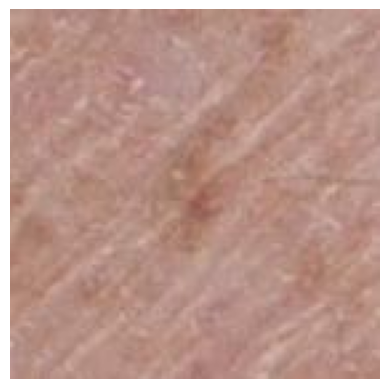

In [17]:
# Converting the scalar value to display an image
# Open the HDF5 file and retrieve the JPEG byte stream
with h5py.File(f'{base_path}/train-image.hdf5', 'r') as f:
    if isic_id in f:
        data = f[isic_id][()]
        if isinstance(data, bytes):  # Ensure data is in bytes
              # Decode the JPEG image from bytes
              image = Image.open(io.BytesIO(data))
            
            # Display the image
              plt.imshow(image)
              plt.axis('off')  # Hide axis/removes axis labels for cleaner display.
              plt.show()
        else:
             print("Data is not in bytes format.")
    else:
         print(f"ISIC ID {isic_id} not found in the HDF5 file.")

Feature Engineering

In [18]:
copy_data.target.value_counts()

target
0    4007
1    1572
Name: count, dtype: int64

In [ ]:
#performing encoding methods on the categorical features
#performing normalization on the numerical features